# Exploratory data Analysis

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # Data Visualisation
import seaborn as sns # Data Visualisation
from collections import Counter as c   #importing collections
from matplotlib.pyplot import plot  #importing matplotlib llibrary
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),    
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),    
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),    
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),    
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]  

for i in range(len(tableau20)):    
    r, g, b = tableau20[i]    
    tableau20[i] = (r / 255., g / 255., b / 255.)

In [1]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.

if os.environ.get('RUNTIME_ENV_LOCATION_TYPE') == 'external':
    endpoint_da2ded19255f4ce4b4e21883df392489 = 'https://s3.us.cloud-object-storage.appdomain.cloud'
else:
    endpoint_da2ded19255f4ce4b4e21883df392489 = 'https://s3.private.us.cloud-object-storage.appdomain.cloud'

client_da2ded19255f4ce4b4e21883df392489 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='Q8CeK9wKWRVjmniIPzuNyJoesOycik3Vs_-4VwfrC4AX',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url=endpoint_da2ded19255f4ce4b4e21883df392489)

body = client_da2ded19255f4ce4b4e21883df392489.get_object(Bucket='h1bvisaprediction-donotdelete-pr-blteyu8iovjydx',Key='h1b_kaggle.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df = pd.read_csv(body)
df.head()


,Unnamed: 0,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,lon,lat
0,1,CERTIFIED-WITHDRAWN,UNIVERSITY OF MICHIGAN,BIOCHEMISTS AND BIOPHYSICISTS,POSTDOCTORAL RESEARCH FELLOW,N,36067.0,2016.0,"ANN ARBOR, MICHIGAN",-83.743038,42.280826
1,2,CERTIFIED-WITHDRAWN,"GOODMAN NETWORKS, INC.",CHIEF EXECUTIVES,CHIEF OPERATING OFFICER,Y,242674.0,2016.0,"PLANO, TEXAS",-96.698886,33.019843
2,3,CERTIFIED-WITHDRAWN,"PORTS AMERICA GROUP, INC.",CHIEF EXECUTIVES,CHIEF PROCESS OFFICER,Y,193066.0,2016.0,"JERSEY CITY, NEW JERSEY",-74.077642,40.728158
3,4,CERTIFIED-WITHDRAWN,"GATES CORPORATION, A WHOLLY-OWNED SUBSIDIARY O...",CHIEF EXECUTIVES,"REGIONAL PRESIDEN, AMERICAS",Y,220314.0,2016.0,"DENVER, COLORADO",-104.990251,39.739236
4,5,WITHDRAWN,PEABODY INVESTMENTS CORP.,CHIEF EXECUTIVES,PRESIDENT MONGOLIA AND INDIA,Y,157518.4,2016.0,"ST. LOUIS, MISSOURI",-90.199404,38.627003


In [3]:
df.shape

(3002458, 11)

In [4]:
df.head()

,Unnamed: 0,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,lon,lat
0,1,CERTIFIED-WITHDRAWN,UNIVERSITY OF MICHIGAN,BIOCHEMISTS AND BIOPHYSICISTS,POSTDOCTORAL RESEARCH FELLOW,N,36067.0,2016.0,"ANN ARBOR, MICHIGAN",-83.743038,42.280826
1,2,CERTIFIED-WITHDRAWN,"GOODMAN NETWORKS, INC.",CHIEF EXECUTIVES,CHIEF OPERATING OFFICER,Y,242674.0,2016.0,"PLANO, TEXAS",-96.698886,33.019843
2,3,CERTIFIED-WITHDRAWN,"PORTS AMERICA GROUP, INC.",CHIEF EXECUTIVES,CHIEF PROCESS OFFICER,Y,193066.0,2016.0,"JERSEY CITY, NEW JERSEY",-74.077642,40.728158
3,4,CERTIFIED-WITHDRAWN,"GATES CORPORATION, A WHOLLY-OWNED SUBSIDIARY O...",CHIEF EXECUTIVES,"REGIONAL PRESIDEN, AMERICAS",Y,220314.0,2016.0,"DENVER, COLORADO",-104.990251,39.739236
4,5,WITHDRAWN,PEABODY INVESTMENTS CORP.,CHIEF EXECUTIVES,PRESIDENT MONGOLIA AND INDIA,Y,157518.4,2016.0,"ST. LOUIS, MISSOURI",-90.199404,38.627003


In [5]:
df.describe()

,Unnamed: 0,PREVAILING_WAGE,YEAR,lon,lat
count,3.002458e+06,3.002373e+06,3.002445e+06,2.895216e+06,2.895216e+06
mean,1.501230e+06,1.469984e+05,2.013855e+03,-9.213441e+01,3.816054e+01
std,8.667351e+05,5.287609e+06,1.680612e+00,1.965591e+01,4.672835e+00
min,1.000000e+00,0.000000e+00,2.011000e+03,-1.578583e+02,1.343719e+01
25%,7.506152e+05,5.437100e+04,2.012000e+03,-1.119261e+02,3.416536e+01
50%,1.501230e+06,6.502100e+04,2.014000e+03,-8.615862e+01,3.910312e+01
75%,2.251844e+06,8.143200e+04,2.015000e+03,-7.551381e+01,4.088374e+01
max,3.002458e+06,6.997607e+09,2.016000e+03,1.457298e+02,6.483778e+01


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3002458 entries, 0 to 3002457
Data columns (total 11 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Unnamed: 0          int64  
 1   CASE_STATUS         object 
 2   EMPLOYER_NAME       object 
 3   SOC_NAME            object 
 4   JOB_TITLE           object 
 5   FULL_TIME_POSITION  object 
 6   PREVAILING_WAGE     float64
 7   YEAR                float64
 8   WORKSITE            object 
 9   lon                 float64
 10  lat                 float64
dtypes: float64(4), int64(1), object(6)
memory usage: 252.0+ MB


In [7]:
print(df['YEAR'].unique())

[2016. 2015. 2014. 2013. 2012. 2011.   nan]


# Data Visualization to get a better inference

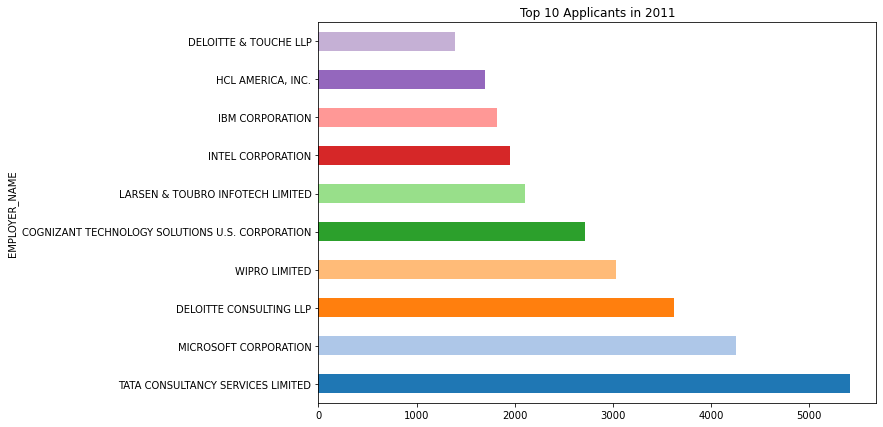

In [8]:
plt.figure(figsize=(10,7))

ax1 = df['EMPLOYER_NAME'][df['YEAR'] == 2011].groupby(df['EMPLOYER_NAME']).count().sort_values(ascending=False).head(10).plot(kind='barh', title = "Top 10 Applicants in 2011",
                                                                                                                           color=tableau20)
ax1.set_label("")
plt.show()

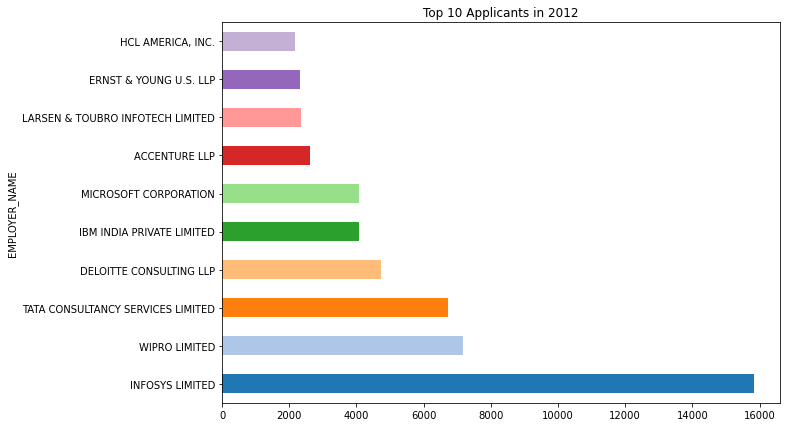

In [9]:
plt.figure(figsize=(10,7))

ax1 = df['EMPLOYER_NAME'][df['YEAR'] == 2012].groupby(df['EMPLOYER_NAME']).count().sort_values(ascending=False).head(10).plot(kind='barh', title = "Top 10 Applicants in 2012",
                                                                                                                           color=tableau20)
ax1.set_label("")
plt.show()

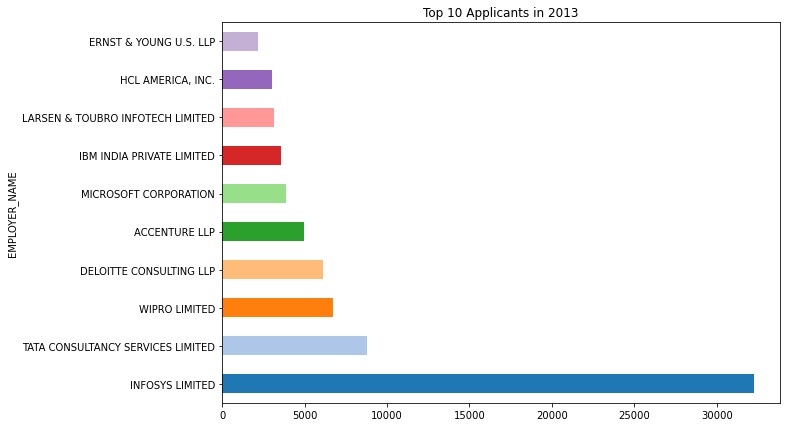

In [10]:
plt.figure(figsize=(10,7))

ax1 = df['EMPLOYER_NAME'][df['YEAR'] == 2013].groupby(df['EMPLOYER_NAME']).count().sort_values(ascending=False).head(10).plot(kind='barh', title = "Top 10 Applicants in 2013",
                                                                                                                           color=tableau20)
ax1.set_label("")
plt.show()

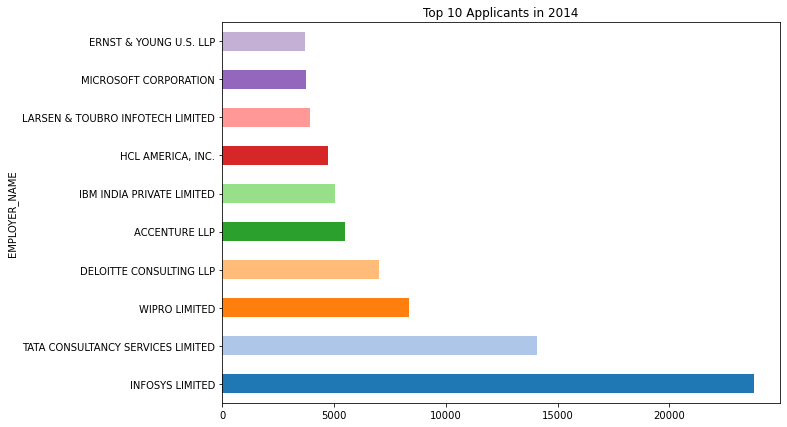

In [11]:
plt.figure(figsize=(10,7))

ax1 = df['EMPLOYER_NAME'][df['YEAR'] == 2014].groupby(df['EMPLOYER_NAME']).count().sort_values(ascending=False).head(10).plot(kind='barh', title = "Top 10 Applicants in 2014",
                                                                                                                           color=tableau20)
ax1.set_label("")
plt.show()

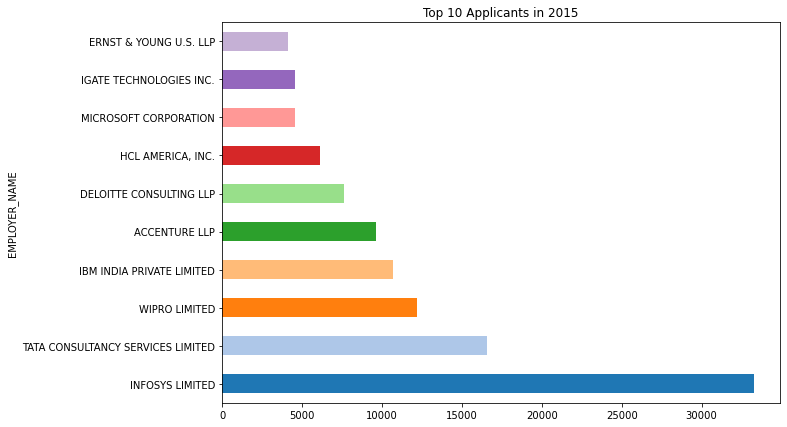

In [12]:
plt.figure(figsize=(10,7))

ax1 = df['EMPLOYER_NAME'][df['YEAR'] == 2015].groupby(df['EMPLOYER_NAME']).count().sort_values(ascending=False).head(10).plot(kind='barh', title = "Top 10 Applicants in 2015",
                                                                                                                           color=tableau20)
ax1.set_label("")
plt.show()

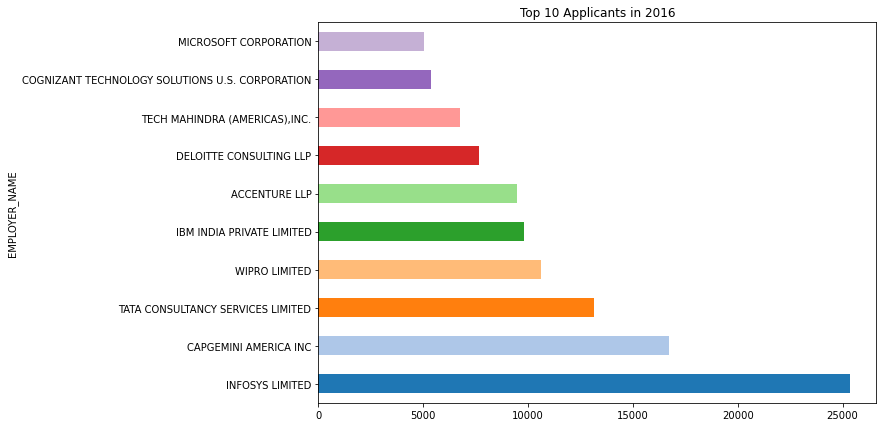

In [13]:
plt.figure(figsize=(10,7))

ax1 = df['EMPLOYER_NAME'][df['YEAR'] == 2016].groupby(df['EMPLOYER_NAME']).count().sort_values(ascending=False).head(10).plot(kind='barh', title = "Top 10 Applicants in 2016",
                                                                                                                           color=tableau20)
ax1.set_label("")
plt.show()

In [14]:
#Analyzing more number of top 10 employees

In [15]:
top_emp = list(df['EMPLOYER_NAME'][df['YEAR'] >= 2015].groupby(df['EMPLOYER_NAME']).count().sort_values(ascending=False).head(10).index)

byempyear = df[['EMPLOYER_NAME', 'YEAR', 'PREVAILING_WAGE']][df['EMPLOYER_NAME'].isin(top_emp)]

byempyear = byempyear.groupby([df['EMPLOYER_NAME'], df['YEAR']])

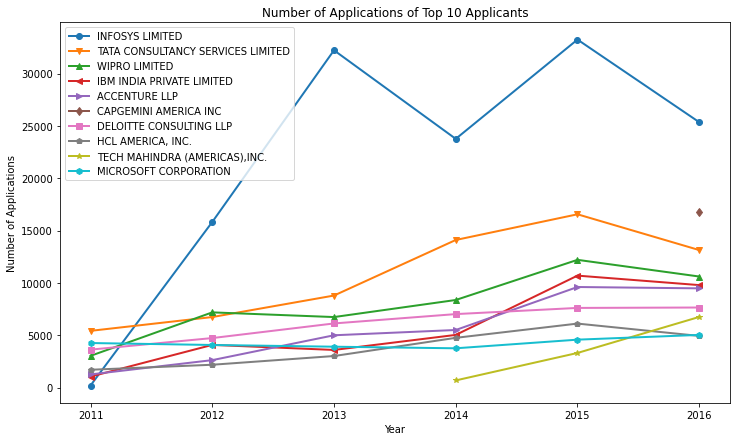

In [16]:
plt.figure(figsize=(12,7))

markers=['o','v','^','<','>','d','s','p','*','h','x','D','o','v','^','<','>','d','s','p','*','h','x','D']

for company in top_emp:
    tmp = byempyear.count().loc[company]
    plt.plot(tmp.index.values, tmp["PREVAILING_WAGE"].values, label=company, linewidth=2,marker=markers[top_emp.index(company)])
plt.xlabel("Year")
plt.ylabel("Number of Applications")
plt.legend()
plt.title('Number of Applications of Top 10 Applicants')
plt.show()

1) We can clearly see that there are 2 new companies which are TECH MAHINDRA (AMERICAS),INC. & CAPGEMINI AMERICA.

2) INFOSYS showed rapid growth between the year 2011 and 2013 where it came from 0 applications to more than 30k applications.

3) TATA also showed a significant growth.

4) From the above plot except the 2 new comers we can say that the number of applications receving to the top 10 employer started decreasing from the year 2015.

5) All the top applications are from India.

6) These are the companies who filed the most number of applicaions.

In [17]:
#Let's check the average salary of each company

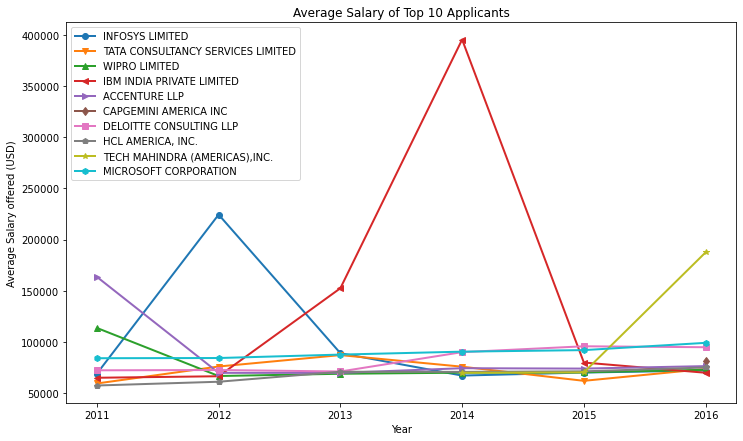

In [18]:
plt.figure(figsize=(12,7))

for company in top_emp:
    tmp = byempyear.mean().loc[company]
    plt.plot(tmp.index.values, tmp["PREVAILING_WAGE"].values, label=company, linewidth=2,marker=markers[top_emp.index(company)])
plt.xlabel("Year")
plt.ylabel("Average Salary offered (USD)")
plt.legend()
plt.title('Average Salary of Top 10 Applicants')
plt.show()

1) We can see that the Average Salary offered by Infosys was very high as compared to rest of the companies in the year 2012.

2) It's very interesting to see a huge peak in 2014 by IBM INDIA PRIVATE LIMITED looking like something went wrong.

3) More sudden peak's were observed by ACCENTURE LLP in year 2011 and by TECH MAHINDRA in the year 2016.

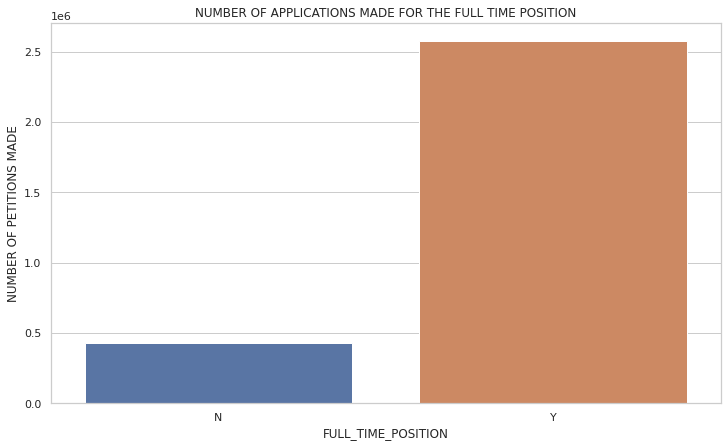

In [19]:
plt.figure(figsize=(12,7))
sns.set(style="whitegrid")
g = sns.countplot(x = 'FULL_TIME_POSITION', data = df)
plt.title("NUMBER OF APPLICATIONS MADE FOR THE FULL TIME POSITION")
plt.ylabel("NUMBER OF PETITIONS MADE")
plt.show()

# Data Pre-processing

In [20]:
df.mean(axis = 1, skipna = True)

0          7.608508e+03
1          4.892566e+04
2          3.901033e+04
3          4.445375e+04
4          3.189757e+04
               ...     
3002453    1.000807e+06
3002454    1.000797e+06
3002455    1.000807e+06
3002456    1.000807e+06
3002457    1.000802e+06
Length: 3002458, dtype: float64

In [21]:
df.drop(['Unnamed: 0', 'EMPLOYER_NAME','JOB_TITLE','WORKSITE', 'lon','lat'], axis = 1,inplace=True)

In [22]:
df.isnull().any()

CASE_STATUS           True
SOC_NAME              True
FULL_TIME_POSITION    True
PREVAILING_WAGE       True
YEAR                  True
dtype: bool

In [23]:
df['CASE_STATUS'].fillna(df['CASE_STATUS'].mode().iloc[0],inplace=True)
df['SOC_NAME'].fillna(df['SOC_NAME'].mode().iloc[0],inplace=True)
df['FULL_TIME_POSITION'].fillna(df['FULL_TIME_POSITION'].mode().iloc[0],inplace=True)
df['YEAR'].fillna(df['YEAR'].mode().iloc[0],inplace=True)

In [24]:
df['PREVAILING_WAGE'].fillna(df['PREVAILING_WAGE'].median(),inplace=True)

In [25]:
print(df['CASE_STATUS'].unique())
print(df['YEAR'].unique())
print(df['FULL_TIME_POSITION'].unique())

['CERTIFIED-WITHDRAWN' 'WITHDRAWN' 'CERTIFIED' 'DENIED' 'REJECTED'
 'INVALIDATED' 'PENDING QUALITY AND COMPLIANCE REVIEW - UNASSIGNED']
[2016. 2015. 2014. 2013. 2012. 2011.]
['N' 'Y']


In [26]:
df.isnull().any()

CASE_STATUS           False
SOC_NAME              False
FULL_TIME_POSITION    False
PREVAILING_WAGE       False
YEAR                  False
dtype: bool

In [27]:
df.CASE_STATUS.value_counts()

CERTIFIED                                             2615636
CERTIFIED-WITHDRAWN                                    202659
DENIED                                                  94346
WITHDRAWN                                               89799
PENDING QUALITY AND COMPLIANCE REVIEW - UNASSIGNED         15
REJECTED                                                    2
INVALIDATED                                                 1
Name: CASE_STATUS, dtype: int64

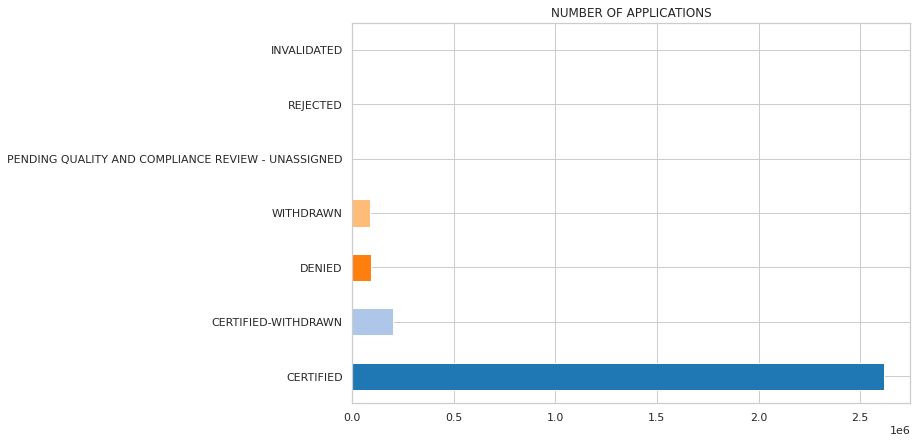

In [28]:
plt.figure(figsize=(10,7))
df.CASE_STATUS.value_counts().plot(kind='barh',  color=tableau20)
df.sort_values('CASE_STATUS')
plt.title("NUMBER OF APPLICATIONS")
plt.show()

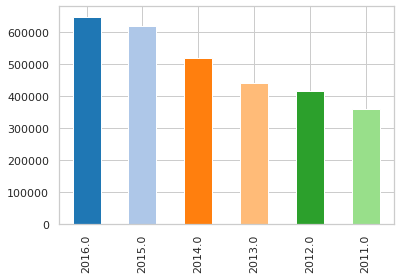

In [29]:
df.YEAR.value_counts().plot(kind = 'bar',color=tableau20)

# Label enconding / Mapping of categorical variable

In [30]:
df['CASE_STATUS'] = df['CASE_STATUS'].map({'CERTIFIED' : 0, 'CERTIFIED-WITHDRAWN' : 1, 'DENIED' : 2,'WITHDRAWN' : 3,'PENDING QUALITY AND COMPLIANCE REVIEW - UNASSIGNED' : 4,'REJECTED' : 5, 'INVALIDATED' : 6})

In [31]:
df['FULL_TIME_POSITION'] = df['FULL_TIME_POSITION'].map({'N' : 0, 'Y' : 1})
df.head()

,CASE_STATUS,SOC_NAME,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR
0,1,BIOCHEMISTS AND BIOPHYSICISTS,0,36067.0,2016.0
1,1,CHIEF EXECUTIVES,1,242674.0,2016.0
2,1,CHIEF EXECUTIVES,1,193066.0,2016.0
3,1,CHIEF EXECUTIVES,1,220314.0,2016.0
4,3,CHIEF EXECUTIVES,1,157518.4,2016.0


# Different kind of label encoding for SOC_NAME



Since there are lakhs of unique values in 'SOC_NAME', we will insert a new column 'SOC_NAME_NEW' to categorize the latter's
values in 15 new category.

In [32]:
import sys
df['SOC_NAME_NEW'] = 'others'
df['SOC_NAME_NEW'][df['SOC_NAME'].str.contains('CHIEF|EXECUTIVES')] = 'Executives'
df['SOC_NAME_NEW'][df['SOC_NAME'].str.contains('Computer|Software')] = 'IT'
df['SOC_NAME_NEW'][df['SOC_NAME'].str.contains('Chief|Management|MANAGERS')] = 'Manager'
df['SOC_NAME_NEW'][df['SOC_NAME'].str.contains('Mechanical')] = 'Mechanical'
df['SOC_NAME_NEW'][df['SOC_NAME'].str.contains('Database')] = 'Database'
df['SOC_NAME_NEW'][df['SOC_NAME'].str.contains('Sales|Market')] = 'Sales & Market'
df['SOC_NAME_NEW'][df['SOC_NAME'].str.contains('FINANCIAL')] = 'Finance'
df['SOC_NAME_NEW'][df['SOC_NAME'].str.contains('Public|Fundraising')] = 'P.R'
df['SOC_NAME_NEW'][df['SOC_NAME'].str.contains('education|law')] = 'Administrative'
df['SOC_NAME_NEW'][df['SOC_NAME'].str.contains('Auditors|Compliance')] = 'Audit'
df['SOC_NAME_NEW'][df['SOC_NAME'].str.contains('Recruiters|Human')] = 'H.R'
df['SOC_NAME_NEW'][df['SOC_NAME'].str.contains('Agricultural|Farm')] = 'Agriculture'
df['SOC_NAME_NEW'][df['SOC_NAME'].str.contains('Construction|Architectural')] = 'Estate'
df['SOC_NAME_NEW'][df['SOC_NAME'].str.contains('Forencsic|Health')] = 'Medical'
df['SOC_NAME_NEW'][df['SOC_NAME'].str.contains('teachers')] = 'Education'

/opt/conda/envs/Python-3.7-OpenCE/lib/python3.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/opt/conda/envs/Python-3.7-OpenCE/lib/python3.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/conda/envs/Python-3.7-OpenCE/lib/python3.7/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/conda/envs/Py

In [33]:
df

,CASE_STATUS,SOC_NAME,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,SOC_NAME_NEW
0,1,BIOCHEMISTS AND BIOPHYSICISTS,0,36067.0,2016.0,others
1,1,CHIEF EXECUTIVES,1,242674.0,2016.0,Executives
2,1,CHIEF EXECUTIVES,1,193066.0,2016.0,Executives
3,1,CHIEF EXECUTIVES,1,220314.0,2016.0,Executives
4,3,CHIEF EXECUTIVES,1,157518.4,2016.0,Executives
...,...,...,...,...,...,...
3002453,0,Computer Systems Analysts,1,65021.0,2016.0,IT
3002454,0,Computer Systems Analysts,1,65021.0,2016.0,IT
3002455,0,Computer Systems Analysts,1,65021.0,2016.0,IT
3002456,0,Computer Systems Analysts,1,65021.0,2016.0,IT


In [34]:
df['SOC_NAME_NEW'].unique()

array(['others', 'Executives', 'Finance', 'Manager', 'IT', 'Audit',
       'Sales & Market', 'Medical', 'P.R', 'Mechanical', 'Database',
       'H.R', 'Estate', 'Agriculture', 'Education', 'Administrative'],
      dtype=object)

In [35]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(df.SOC_NAME_NEW)
# print list(le.classes_)
df['SOC_N']=le.transform(df['SOC_NAME_NEW'])

In [36]:
group = df.groupby('SOC_NAME_NEW')
df2 = group.apply(lambda x: x['SOC_N'].unique())
df2

SOC_NAME_NEW
Administrative     [0]
Agriculture        [1]
Audit              [2]
Database           [3]
Education          [4]
Estate             [5]
Executives         [6]
Finance            [7]
H.R                [8]
IT                 [9]
Manager           [10]
Mechanical        [11]
Medical           [12]
P.R               [13]
Sales & Market    [14]
others            [15]
dtype: object

In [37]:
df.loc[df['CASE_STATUS'] == 5]

,CASE_STATUS,SOC_NAME,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,SOC_NAME_NEW,SOC_N
1605559,5,"Software Developers, Applications",1,57886.0,2014.0,IT,9
1728391,5,Physical Therapists,1,53248.0,2014.0,others,15


In [38]:
df

,CASE_STATUS,SOC_NAME,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,SOC_NAME_NEW,SOC_N
0,1,BIOCHEMISTS AND BIOPHYSICISTS,0,36067.0,2016.0,others,15
1,1,CHIEF EXECUTIVES,1,242674.0,2016.0,Executives,6
2,1,CHIEF EXECUTIVES,1,193066.0,2016.0,Executives,6
3,1,CHIEF EXECUTIVES,1,220314.0,2016.0,Executives,6
4,3,CHIEF EXECUTIVES,1,157518.4,2016.0,Executives,6
...,...,...,...,...,...,...,...
3002453,0,Computer Systems Analysts,1,65021.0,2016.0,IT,9
3002454,0,Computer Systems Analysts,1,65021.0,2016.0,IT,9
3002455,0,Computer Systems Analysts,1,65021.0,2016.0,IT,9
3002456,0,Computer Systems Analysts,1,65021.0,2016.0,IT,9


In [39]:
df = df.drop(['SOC_NAME','SOC_NAME_NEW'], axis=1)

In [40]:
df

,CASE_STATUS,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,SOC_N
0,1,0,36067.0,2016.0,15
1,1,1,242674.0,2016.0,6
2,1,1,193066.0,2016.0,6
3,1,1,220314.0,2016.0,6
4,3,1,157518.4,2016.0,6
...,...,...,...,...,...
3002453,0,1,65021.0,2016.0,9
3002454,0,1,65021.0,2016.0,9
3002455,0,1,65021.0,2016.0,9
3002456,0,1,65021.0,2016.0,9


# Correlation of all the variables using corr() table and heatmap

In [41]:
df.corr()

,CASE_STATUS,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,SOC_N
CASE_STATUS,1.000000,-0.010730,0.040770,-0.039020,0.023508
FULL_TIME_POSITION,-0.010730,1.000000,0.005977,-0.388607,-0.262960
PREVAILING_WAGE,0.040770,0.005977,1.000000,-0.007856,-0.004198
YEAR,-0.039020,-0.388607,-0.007856,1.000000,0.467673
SOC_N,0.023508,-0.262960,-0.004198,0.467673,1.000000


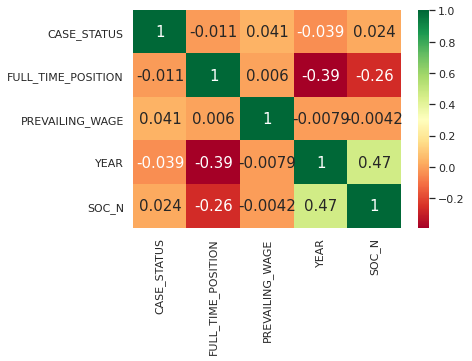

In [42]:
sns.heatmap(df.corr(), annot=True, cmap="RdYlGn", annot_kws={"size":15})

# Removal of Outliers

In [43]:
from scipy import stats

In [44]:
z=np.abs(stats.zscore(df))
z

array([[1.21206148, 2.45815681, 0.02097937, 1.27630201, 0.80450972],
       [1.21206148, 0.40680887, 0.01809499, 1.27630201, 1.98842298],
       [1.21206148, 0.40680887, 0.00871293, 1.27630201, 1.98842298],
       ...,
       [0.34205146, 0.40680887, 0.01550347, 1.27630201, 1.05744541],
       [0.34205146, 0.40680887, 0.01550347, 1.27630201, 1.05744541],
       [0.34205146, 0.40680887, 0.01550347, 1.27630201, 1.05744541]])

In [45]:
z.shape

(3002458, 5)

In [46]:
threshold=3
np.where(z>threshold)

(array([      4,       9,      69, ..., 3002442, 3002443, 3002444]),
 array([0, 0, 0, ..., 0, 0, 0]))

In [47]:
clean_df= pd.DataFrame(df)
clean_df

,CASE_STATUS,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,SOC_N
0,1,0,36067.0,2016.0,15
1,1,1,242674.0,2016.0,6
2,1,1,193066.0,2016.0,6
3,1,1,220314.0,2016.0,6
4,3,1,157518.4,2016.0,6
...,...,...,...,...,...
3002453,0,1,65021.0,2016.0,9
3002454,0,1,65021.0,2016.0,9
3002455,0,1,65021.0,2016.0,9
3002456,0,1,65021.0,2016.0,9


In [48]:
df_no_outliers=clean_df[(z<=3).all(axis=1)]
df_no_outliers

,CASE_STATUS,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,SOC_N
0,1,0,36067.0,2016.0,15
1,1,1,242674.0,2016.0,6
2,1,1,193066.0,2016.0,6
3,1,1,220314.0,2016.0,6
5,1,1,225000.0,2016.0,6
...,...,...,...,...,...
3002453,0,1,65021.0,2016.0,9
3002454,0,1,65021.0,2016.0,9
3002455,0,1,65021.0,2016.0,9
3002456,0,1,65021.0,2016.0,9


In [49]:
df_no_outliers.shape

(2875910, 5)

# Bi-furcating dataframe in dependent 'y' and independent 'x' dataframe

In [50]:
selcols=["FULL_TIME_POSITION","PREVAILING_WAGE","YEAR","SOC_N"]
x=pd.DataFrame(df_no_outliers,columns=selcols)
y=pd.DataFrame(df_no_outliers,columns=['CASE_STATUS'])

# Feature Importance of independent variables in x to predict y

In [51]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(x,y.values.ravel())

ExtraTreesRegressor()

In [52]:
print(model.feature_importances_)

[0.00934184 0.91110352 0.03374239 0.04581224]


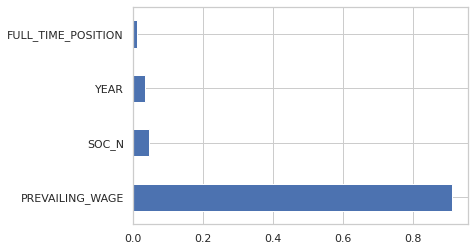

In [53]:
#Plot graph for feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

Prevailing wage has the highest feature importance followed by SOC_N

# Splitting of data in training and test dataset 

In [54]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 42)

# Logistic Regression

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
LogReg = LogisticRegression()
LogReg.fit(x_train, y_train.values.ravel())
y_pred = LogReg.predict(x_test)

In [63]:
print(y_pred)

[0 0 0 ... 0 0 0]


In [58]:
!pip install ibm_watson_machine_learning

/opt/conda/envs/Python-3.7-OpenCE/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-OpenCE/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes


In [59]:
from ibm_watson_machine_learning import APIClient
wml_credentials = {
    "url": "https://us-south.ml.cloud.ibm.com",
    "apikey": "IPaBSf1Wot6_h4V96vdPGcOgSlAq0tSiFO1ZB7cuE6b4"
}
client = APIClient(wml_credentials)

In [60]:
def guid_from_space_name(client, space_name):
    space = client.spaces.get_details()
    return(next(item for item in space['resources'] if item['entity']['name'] == space_name)['metadata']['id'])

In [61]:
space_uid = guid_from_space_name(client,'models')
print("Space UID = " + space_uid)

Space UID = 0dc08b6c-4466-4d6e-921f-f262cb27a68a


In [62]:
client.set.default_space(space_uid)

'SUCCESS'

In [64]:
client.software_specifications.list()

-----------------------------  ------------------------------------  ----
NAME                           ASSET_ID                              TYPE
default_py3.6                  0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
pytorch-onnx_1.3-py3.7-edt     069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6        09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12     09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
ai-function_0.1-py3.6          0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                     0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod   1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6              10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl      111e41b3-de2d-5422-a4d6-bf776828c4b7  base
scikit-learn_0.22-py3.6        154010fa-5b3b-4ac1-82af-4d5ee5abbc85  base
default_r3.6                   1b70aec3-ab34-4b87-8aa0-a4a3c8296a36  base
pytorch-onnx_1.3-py3.6         1bc6029

In [65]:
software_spec_uid = client.software_specifications.get_uid_by_name("default_py3.7")
software_spec_uid

'e4429883-c883-42b6-87a8-f419d64088cd'

In [ ]:
model_details = client.repository.store_model(model=LogReg,meta_props={
    client.repository.ModelMetaNames.NAME:"Visa_prediction",
    client.repository.ModelMetaNames.TYPE:"scikit-learn_0.23",
    client.repository.ModelMetaNames.NAME:"Visa_prediction",
})

In [56]:
# Saving L.R model using joblib

In [62]:
#import joblib
#joblib.dump(LogReg,"logreg.save")

['logreg.save']

# Accuracy test for L.R model

In [70]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

array([[645725,      0,      0],
       [ 50547,      0,      1],
       [ 22674,      0,     31]], dtype=int64)

In [61]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

C:\Users\ARYAMAN\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ARYAMAN\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.90      1.00      0.95    645725
           1       0.00      0.00      0.00     50548
           2       0.97      0.00      0.00     22705

    accuracy                           0.90    718978
   macro avg       0.62      0.33      0.32    718978
weighted avg       0.84      0.90      0.85    718978



C:\Users\ARYAMAN\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Decision tree Classifier

In [66]:
from sklearn import tree
model_dt = tree.DecisionTreeClassifier()
model_dt.fit(x_train, y_train)
y_pred_dt = model_dt.predict(x_test)
print(y_pred_dt)

[0 0 0 ... 0 0 0]


# Accuracy test

In [71]:
from sklearn.metrics import confusion_matrix
confusion_matrix_dt = confusion_matrix(y_test, y_pred_dt)
confusion_matrix_dt

array([[637058,   5571,   3096],
       [ 43494,   6864,    190],
       [ 21264,    304,   1137]], dtype=int64)

In [72]:
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95    645725
           1       0.54      0.14      0.22     50548
           2       0.26      0.05      0.08     22705

    accuracy                           0.90    718978
   macro avg       0.57      0.39      0.42    718978
weighted avg       0.86      0.90      0.87    718978



# Random Forest Classification

In [62]:
#from sklearn.model_selection import GridSearchCV
#n_estimators = [100, 300, 500, 800, 1200]
#max_depth = [5, 8, 15, 25, 30]
#min_samples_split = [2, 5, 10, 15, 100]
#min_samples_leaf = [1, 2, 5, 10] 

#hyperF = dict(n_estimators = n_estimators, max_depth = max_depth, min_samples_split = min_samples_split,min_samples_leaf = min_samples_leaf)
#gridF = GridSearchCV(forest, hyperF, cv = 3, verbose = 1, n_jobs = -1)
#bestF = gridF.fit(x_train, y_train)

NOTE: We tried to use GridSearchCV to get the optimal performance of model by tuning the hyperparameters, but since the dataset enteries were quite large, it simply didn't work.  

In [71]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train, y_train.values.ravel())

RandomForestClassifier()

In [63]:
joblib.dump(rf,"rf.save")

['rf.save']

In [72]:
y_pred_rf =rf.predict(x_test)
print(y_pred_rf)

[0 0 0 ... 0 0 0]


# Accuracy test for Random forest

In [73]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94    645725
           1       0.52      0.14      0.22     50548
           2       0.25      0.06      0.09     22705

    accuracy                           0.90    718978
   macro avg       0.56      0.39      0.42    718978
weighted avg       0.86      0.90      0.87    718978



# Another accuracy test to compare which algorithm is better

In [78]:
# Logistic Regression
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8981582190275641

In [79]:
# Decision Tree
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred_dt)

0.8971887874176957

In [75]:
# Random Forest classification
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred_rf)

0.8960802694936424

# Conclusion

At the end of our modelling step, we build three models: Logistic Regression, Decision Tree and Random Forest, We noticed that the Logistic Regression gave a better result compared to others. Hence, it will be selected to deploy the web application using IBM cloud.